# Note this model excluded regio1, postalcodes, firingtypes and conditions

they didn't have much influence, since we have cities
interesting about heating type though

In [188]:
import pandas as pd
import seaborn as sns
#the file is a number of data from ImmoScout (webscrapped for all Germany)
file_path = 'https://raw.githubusercontent.com/okravtsova123/ironhack_study/main/MidTermProject/rent.csv'

# reading file with different encodings
try:
    df = pd.read_csv(file_path, encoding='utf-8', sep=';')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='latin-1',  sep=';')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='ISO-8859-1',  sep=';')


# Cleanng and preparing data

In [525]:
#checking the df
df.head()

,baserent,balcony,haskitchen,cellar,livingspace,petsallowed,firingtypes,geo_krs,lift,norooms,floor,garden,energyefficiencyclass
0,1338.43,True,True,True,73.54,negotiable,district_heating,Berlin,True,2.0,0.0,False,B
1,1390.00,True,False,False,33.00,no,district_heating,M?nchen,True,1.0,3.0,False,C
2,1299.00,True,False,True,90.30,negotiable,district_heating,Hamburg,True,3.0,2.0,False,B
3,1680.00,True,True,True,91.00,no,gas,M?nchen,True,1.5,2.0,False,A
4,992.80,False,False,True,116.80,no,gas,Unna_Kreis,True,4.0,3.0,False,A_PLUS


In [526]:
# Performing additional formatting for column names (lowercase, strip and replace spaces with underscores) - esier to work further
df.columns = [name.strip().replace(" ", "_").lower() for name in df.columns]

In [527]:
df.columns

Index(['baserent', 'balcony', 'haskitchen', 'cellar', 'livingspace',
       'petsallowed', 'firingtypes', 'geo_krs', 'lift', 'norooms', 'floor',
       'garden', 'energyefficiencyclass'],
      dtype='object')

In [528]:
#function to check null values
def null_check(df):
    print(f'Total null values per row: \n{df.isnull().sum(axis=1)}\n')
    print(f'Total null values per column: \n{df.isnull().sum()}\n')

In [529]:
#applying
null_check(df)

Total null values per row: 
0       0
1       0
2       0
3       0
4       0
       ..
3366    0
3367    0
3368    0
3369    0
3370    0
Length: 3371, dtype: int64

Total null values per column: 
baserent                 0
balcony                  0
haskitchen               0
cellar                   0
livingspace              0
petsallowed              0
firingtypes              0
geo_krs                  0
lift                     0
norooms                  0
floor                    0
garden                   0
energyefficiencyclass    0
dtype: int64



In [530]:
#function to find duplicates
def dup_check(df):
    print(f'Duplicates found: {df.duplicated().any()}\n')
    print(f'Number of duplicates: {df.duplicated().sum()}\n')

In [531]:
dup_check(df)

Duplicates found: True

Number of duplicates: 167



In [532]:
#Choosing only new buildings as rent is not controlled by government
df = df[(df['newlyconst']== True)]

KeyError: 'newlyconst'

In [533]:
df["geo_krs"].nunique()

297

In [534]:
#choosing the facors for the model
df = df.loc[:, ['baserent', 'firingtypes', 'balcony', 'haskitchen',
       'cellar','livingspace', 'petsallowed', 'geo_krs', 'lift', 'norooms', 'floor', 'garden', 'energyefficiencyclass']]


In [535]:
df

,baserent,firingtypes,balcony,haskitchen,cellar,livingspace,petsallowed,geo_krs,lift,norooms,floor,garden,energyefficiencyclass
0,1338.43,district_heating,True,True,True,73.54,negotiable,Berlin,True,2.0,0.0,False,B
1,1390.00,district_heating,True,False,False,33.00,no,M?nchen,True,1.0,3.0,False,C
2,1299.00,district_heating,True,False,True,90.30,negotiable,Hamburg,True,3.0,2.0,False,B
3,1680.00,gas,True,True,True,91.00,no,M?nchen,True,1.5,2.0,False,A
4,992.80,gas,False,False,True,116.80,no,Unna_Kreis,True,4.0,3.0,False,A_PLUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366,1533.92,district_heating,True,True,False,121.74,yes,Dresden,True,5.0,2.0,False,C
3367,1162.88,district_heating,True,True,True,58.88,negotiable,Berlin,True,2.0,0.0,True,C
3368,1450.00,renewable_energy_heating,True,True,True,135.00,no,T?bingen_Kreis,False,5.5,1.0,False,A_PLUS
3369,1383.33,district_heating,True,True,True,106.41,yes,Dresden,True,5.0,5.0,False,B


In [536]:
df = df.reset_index()

In [537]:
df

,index,baserent,firingtypes,balcony,haskitchen,cellar,livingspace,petsallowed,geo_krs,lift,norooms,floor,garden,energyefficiencyclass
0,0,1338.43,district_heating,True,True,True,73.54,negotiable,Berlin,True,2.0,0.0,False,B
1,1,1390.00,district_heating,True,False,False,33.00,no,M?nchen,True,1.0,3.0,False,C
2,2,1299.00,district_heating,True,False,True,90.30,negotiable,Hamburg,True,3.0,2.0,False,B
3,3,1680.00,gas,True,True,True,91.00,no,M?nchen,True,1.5,2.0,False,A
4,4,992.80,gas,False,False,True,116.80,no,Unna_Kreis,True,4.0,3.0,False,A_PLUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366,3366,1533.92,district_heating,True,True,False,121.74,yes,Dresden,True,5.0,2.0,False,C
3367,3367,1162.88,district_heating,True,True,True,58.88,negotiable,Berlin,True,2.0,0.0,True,C
3368,3368,1450.00,renewable_energy_heating,True,True,True,135.00,no,T?bingen_Kreis,False,5.5,1.0,False,A_PLUS
3369,3369,1383.33,district_heating,True,True,True,106.41,yes,Dresden,True,5.0,5.0,False,B


In [538]:
null_check(df)

Total null values per row: 
0       0
1       0
2       0
3       0
4       0
       ..
3366    0
3367    0
3368    0
3369    0
3370    0
Length: 3371, dtype: int64

Total null values per column: 
index                    0
baserent                 0
firingtypes              0
balcony                  0
haskitchen               0
cellar                   0
livingspace              0
petsallowed              0
geo_krs                  0
lift                     0
norooms                  0
floor                    0
garden                   0
energyefficiencyclass    0
dtype: int64



In [539]:
df = df.dropna()

In [540]:
#checking unqiue values in hitting
#df['heatingtypes'].unique()

In [541]:
#checking unqiue values in coditions
#df['condition'].unique()

In [542]:
#checking unqiue values in coditions
#df['firingtypes'].nunique()

In [543]:
#unifying first time use and all refurbishement, modernization and renovation in 1 thing

#def condition_clean(state):
#        if 'first_time_use' in state:
#           state='first_time_use'
#        elif state=='fully_renovated' or state=='refurbished' or state=='modernized':
#           state='refurbished'
#       else:
#           state=state
#       return state
    
#unifying types of firing

def firingtypes_clean(ftype):
    if 'gas' in ftype:
        ftype='gas'
    elif 'electricity' in ftype:
        ftype='electricity'
    elif 'solar_heating' in ftype or 'wind_energy' in ftype or'hydro_energy' in ftype or 'bio_energy' in ftype or 'geothermal' in ftype or 'thermal_energy' in ftype or 'renewable_energy' in ftype or 'regenerative_energy' in ftype:
        ftype='renewable_energy_heating'
    elif "pellet_heating" in ftype or 'fossil_fuels' in ftype or 'wood_chips' in ftype:
        ftype='pellet_heating'
    elif 'district_heating' in ftype:
        ftype='district_heating'
    else:
        ftype=ftype
    return ftype

In [544]:
#applying defined function for cleaning    
#df['condition']=df['condition'].apply(condition_clean)
df['firingtypes']=df['firingtypes'].apply(firingtypes_clean)

In [545]:
#checking energyefficiencyclass
print(df["energyefficiencyclass"].groupby(df["energyefficiencyclass"]).count())

#droping rows with NO_INFORMATION
df=df[df["energyefficiencyclass"]!='NO_INFORMATION'].reset_index()

energyefficiencyclass
A         1036
A_PLUS     861
B         1168
C          244
D           49
E            8
F            5
Name: energyefficiencyclass, dtype: int64


In [546]:
#cleaning two useless columns. And heatng type is removed as it's a copy of firing type
columns_needed=['baserent', 'balcony', 'haskitchen',
       'cellar','livingspace', 'petsallowed', 'firingtypes', 'geo_krs', 'lift', 'norooms', 'floor', 'garden', 'energyefficiencyclass']
df=df.loc[: , columns_needed]

In [547]:
#cheking spelling mistakes in regio1
#df['regio1'].groupby(df['regio1']).count()

In [548]:
#clening misspellings

def regio1_clean(region):
    if region=='Baden_W?rttemberg':
        region='Baden-Württemberg'
    elif region=='Th?ringen':
        region='Thüringia'
    else:
        region=region
    return region

In [549]:
#applying
#df['regio1']=df['regio1'].apply(regio1_clean)

In [550]:
#cheking spelling mistakes in geo_krs
#REMOVE cities with less than 10 appartments, because they give too much influence in model
cities = df.groupby('geo_krs').size().reset_index(name='count')
cities_to_drop = cities[cities['count'] <= 0]
df = df[~df['geo_krs'].isin(cities_to_drop['geo_krs'])].reset_index(drop=True)
df['geo_krs'].groupby(df['geo_krs']).count()

geo_krs
Aachen                     26
Aachen_Kreis               24
Ahrweiler_Kreis             1
Aichach_Friedberg_Kreis     2
Alb_Donau_Kreis             5
                           ..
Wolfsburg                  19
Worms                       1
Wuppertal                   4
Zollernalbkreis             4
Zweibr?cken                 1
Name: geo_krs, Length: 297, dtype: int64

In [551]:
#checking pets
df['petsallowed'].groupby(df['petsallowed']).count()

petsallowed
negotiable    1956
no            1241
yes            174
Name: petsallowed, dtype: int64

In [552]:
#checking outliers - identifying IQR

df['baserent'].describe()
IQR=df['baserent'].quantile(0.75)-df['baserent'].quantile(0.25)
base_min=df['baserent'].quantile(0.25)-1.5*IQR
base_max=df['baserent'].quantile(0.75)+3*IQR
print(base_min, base_max)

#countring how many flats are outliers
x_low=0
x_high=0
for price in df['baserent']:
    if price<base_min:
        x_low+=1
    elif price>base_max:
        x_high+=1

print(f'outliers too low:{x_low}\noutliers too high: {x_high}')

-25.0 3000.0
outliers too low:0
outliers too high: 0


In [553]:
#dropping rows with outliers
df=df.loc[df['baserent']<base_max]

In [554]:
df.isna().sum()

baserent                 0
balcony                  0
haskitchen               0
cellar                   0
livingspace              0
petsallowed              0
firingtypes              0
geo_krs                  0
lift                     0
norooms                  0
floor                    0
garden                   0
energyefficiencyclass    0
dtype: int64

In [555]:
#file_path = r"C:\Users\user\Desktop\ironhack_study\MidTermProject\output.csv"
#df.to_csv(file_path, index=False)

# ENCODING FACTORS FOR MODEL CREATION

In [556]:
#splitting df into numericals and categoricals
categoricals = df.select_dtypes(include=[object, bool])
numericals = df.select_dtypes(include = 'number')

In [557]:
categoricals

,balcony,haskitchen,cellar,petsallowed,firingtypes,geo_krs,lift,garden,energyefficiencyclass
0,True,True,True,negotiable,district_heating,Berlin,True,False,B
1,True,False,False,no,district_heating,M?nchen,True,False,C
2,True,False,True,negotiable,district_heating,Hamburg,True,False,B
3,True,True,True,no,gas,M?nchen,True,False,A
4,False,False,True,no,gas,Unna_Kreis,True,False,A_PLUS
...,...,...,...,...,...,...,...,...,...
3366,True,True,False,yes,district_heating,Dresden,True,False,C
3367,True,True,True,negotiable,district_heating,Berlin,True,True,C
3368,True,True,True,no,renewable_energy_heating,T?bingen_Kreis,False,False,A_PLUS
3369,True,True,True,yes,district_heating,Dresden,True,False,B


In [558]:
categoricals = categoricals.drop(columns="geo_krs")

In [559]:
numericals

,baserent,livingspace,norooms,floor
0,1338.43,73.54,2.0,0.0
1,1390.00,33.00,1.0,3.0
2,1299.00,90.30,3.0,2.0
3,1680.00,91.00,1.5,2.0
4,992.80,116.80,4.0,3.0
...,...,...,...,...
3366,1533.92,121.74,5.0,2.0
3367,1162.88,58.88,2.0,0.0
3368,1450.00,135.00,5.5,1.0
3369,1383.33,106.41,5.0,5.0


In [560]:
ordinals = categoricals[["energyefficiencyclass", "balcony","haskitchen", "cellar", "lift", "garden", "petsallowed"]].reset_index()
nominals = categoricals.drop(columns=["energyefficiencyclass", "balcony","haskitchen", "cellar", "lift", "garden","petsallowed"]).reset_index()

In [561]:
nominals=nominals.drop('index', axis=1)
nominals

,firingtypes
0,district_heating
1,district_heating
2,district_heating
3,gas
4,gas
...,...
3366,district_heating
3367,district_heating
3368,renewable_energy_heating
3369,district_heating


In [478]:
#checking how we will encode the ordinals
ordinals["energyefficiencyclass"].groupby(df["energyefficiencyclass"]).count()

energyefficiencyclass
A         1036
A_PLUS     861
B         1168
C          244
D           49
E            8
F            5
Name: energyefficiencyclass, dtype: int64

In [479]:
from sklearn.preprocessing import OrdinalEncoder

In [480]:
#encoding energy efficiency class for model creation

enc = OrdinalEncoder(categories=[["F", "E", "D", "C", "B","A", "A_PLUS"]])

ordinals["energyefficiencyclass"] = enc.fit_transform(ordinals[["energyefficiencyclass"]])

In [481]:
#encoding haskitchen for model creation

ordinals["haskitchen"] = ordinals["haskitchen"].astype(object)
enc = OrdinalEncoder(categories=[[False, True]])
ordinals["haskitchen"] = enc.fit_transform(ordinals[["haskitchen"]])

In [482]:
#encoding balcony for model creation

ordinals["balcony"] = ordinals["balcony"].astype(object)
enc = OrdinalEncoder(categories=[[False, True]])
ordinals["balcony"] = enc.fit_transform(ordinals[["balcony"]])

In [483]:
#encoding cellar for model creation

ordinals["cellar"] = ordinals["cellar"].astype(object)
enc = OrdinalEncoder(categories=[[False, True]])
ordinals["cellar"] = enc.fit_transform(ordinals[["cellar"]])

In [484]:
#encoding lift for model creation

ordinals["lift"] = ordinals["lift"].astype(object)
enc = OrdinalEncoder(categories=[[False, True]])
ordinals["lift"] = enc.fit_transform(ordinals[["lift"]])

In [485]:
#encoding garden for model creation

ordinals["garden"] = ordinals["garden"].astype(object)
enc = OrdinalEncoder(categories=[[False, True]])
ordinals["garden"] = enc.fit_transform(ordinals[["garden"]])

In [486]:
#encoding petsallowed for model creation

enc = OrdinalEncoder(categories=[['no', 'negotiable', 'yes']])
ordinals["petsallowed"] = enc.fit_transform(ordinals[["petsallowed"]])

In [487]:
ordinals.isna().sum()

index                    0
energyefficiencyclass    0
balcony                  0
haskitchen               0
cellar                   0
lift                     0
garden                   0
petsallowed              0
dtype: int64

In [488]:
#making dunnies from nominals
nominals = pd.get_dummies(nominals, dtype=int)

In [489]:
nominals.isna().sum()

firingtypes_district_heating            0
firingtypes_electricity                 0
firingtypes_gas                         0
firingtypes_heat_supply                 0
firingtypes_local_heating               0
firingtypes_oil                         0
firingtypes_pellet_heating              0
firingtypes_renewable_energy_heating    0
firingtypes_wood                        0
dtype: int64

In [490]:
#concating ordinals and nominals
categorical = pd.concat([ordinals,nominals], axis=1).reset_index()

In [491]:
categorical.isna().sum()

level_0                                 0
index                                   0
energyefficiencyclass                   0
balcony                                 0
haskitchen                              0
cellar                                  0
lift                                    0
garden                                  0
petsallowed                             0
firingtypes_district_heating            0
firingtypes_electricity                 0
firingtypes_gas                         0
firingtypes_heat_supply                 0
firingtypes_local_heating               0
firingtypes_oil                         0
firingtypes_pellet_heating              0
firingtypes_renewable_energy_heating    0
firingtypes_wood                        0
dtype: int64

In [492]:
categorical=categorical.drop(['level_0', 'index'], axis=1)

In [493]:
categorical=categorical.reset_index()

In [494]:
numericals=numericals.reset_index()

In [495]:
numericals

,index,baserent,livingspace,norooms,floor
0,0,1338.43,73.54,2.0,0.0
1,1,1390.00,33.00,1.0,3.0
2,2,1299.00,90.30,3.0,2.0
3,3,1680.00,91.00,1.5,2.0
4,4,992.80,116.80,4.0,3.0
...,...,...,...,...,...
3366,3366,1533.92,121.74,5.0,2.0
3367,3367,1162.88,58.88,2.0,0.0
3368,3368,1450.00,135.00,5.5,1.0
3369,3369,1383.33,106.41,5.0,5.0


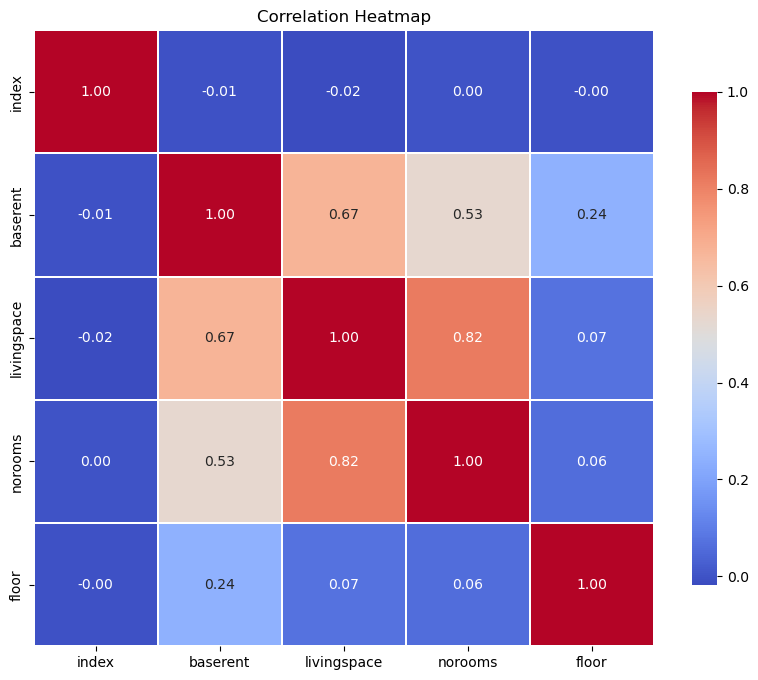

In [496]:
import matplotlib.pyplot as plt
corr_matrix = numericals.corr()
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap')  # Optional: Add a title to your heatmap
plt.show()

In [497]:
#concating categoricals and numericals
final_df = pd.concat([numericals,categorical], axis=1).drop('index', axis=1)

In [498]:
final_df

,baserent,livingspace,norooms,floor,energyefficiencyclass,balcony,haskitchen,cellar,lift,garden,petsallowed,firingtypes_district_heating,firingtypes_electricity,firingtypes_gas,firingtypes_heat_supply,firingtypes_local_heating,firingtypes_oil,firingtypes_pellet_heating,firingtypes_renewable_energy_heating,firingtypes_wood
0,1338.43,73.54,2.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1,0,0,0,0,0,0,0,0
1,1390.00,33.00,1.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0
2,1299.00,90.30,3.0,2.0,4.0,1.0,0.0,1.0,1.0,0.0,1.0,1,0,0,0,0,0,0,0,0
3,1680.00,91.00,1.5,2.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
4,992.80,116.80,4.0,3.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366,1533.92,121.74,5.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,2.0,1,0,0,0,0,0,0,0,0
3367,1162.88,58.88,2.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0
3368,1450.00,135.00,5.5,1.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0
3369,1383.33,106.41,5.0,5.0,4.0,1.0,1.0,1.0,1.0,0.0,2.0,1,0,0,0,0,0,0,0,0


# Model creation
## X-y split (y is the target variable, in this case, "base rent")

In [499]:
#X-y split
X=final_df.drop('baserent', axis=1)
y=final_df[['baserent']]

In [500]:
X

,livingspace,norooms,floor,energyefficiencyclass,balcony,haskitchen,cellar,lift,garden,petsallowed,firingtypes_district_heating,firingtypes_electricity,firingtypes_gas,firingtypes_heat_supply,firingtypes_local_heating,firingtypes_oil,firingtypes_pellet_heating,firingtypes_renewable_energy_heating,firingtypes_wood
0,73.54,2.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1,0,0,0,0,0,0,0,0
1,33.00,1.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0
2,90.30,3.0,2.0,4.0,1.0,0.0,1.0,1.0,0.0,1.0,1,0,0,0,0,0,0,0,0
3,91.00,1.5,2.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
4,116.80,4.0,3.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366,121.74,5.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,2.0,1,0,0,0,0,0,0,0,0
3367,58.88,2.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0
3368,135.00,5.5,1.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0
3369,106.41,5.0,5.0,4.0,1.0,1.0,1.0,1.0,0.0,2.0,1,0,0,0,0,0,0,0,0


In [501]:
y

,baserent
0,1338.43
1,1390.00
2,1299.00
3,1680.00
4,992.80
...,...
3366,1533.92
3367,1162.88
3368,1450.00
3369,1383.33


## train_test_split

In [502]:
#train_test split

In [503]:
from sklearn.model_selection import train_test_split

In [504]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [505]:
X_train

,livingspace,norooms,floor,energyefficiencyclass,balcony,haskitchen,cellar,lift,garden,petsallowed,firingtypes_district_heating,firingtypes_electricity,firingtypes_gas,firingtypes_heat_supply,firingtypes_local_heating,firingtypes_oil,firingtypes_pellet_heating,firingtypes_renewable_energy_heating,firingtypes_wood
1023,103.05,4.0,2.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0
2050,50.01,2.0,3.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0
272,110.30,4.0,0.0,5.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0,1,0,0,0,0,0,0
1487,77.61,2.0,2.0,5.0,1.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0
521,107.26,3.0,2.0,6.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,53.97,2.0,6.0,5.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0,1,0,0,0,0,0,0
1130,108.49,4.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,1,0
1294,113.81,4.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0
860,61.65,2.0,2.0,6.0,1.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,1,0


In [506]:
#X_train.hist()

array([[<Axes: title={'center': 'baserent'}>]], dtype=object)

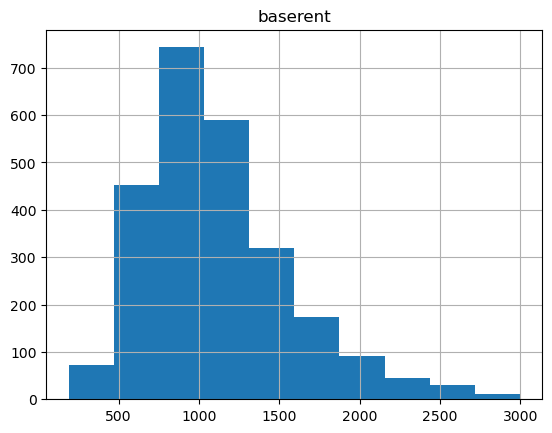

In [507]:
y_train.hist()

## using powertransform for X and Y


In [402]:
from sklearn.preprocessing import PowerTransformer

In [403]:
#fitting power transformer to use in train and test sets

pt=PowerTransformer()
pt.fit(X_train)

PowerTransformer()

In [404]:
#transforming train and test sets

X_train=pt.transform(X_train)
X_test=pt.transform(X_test)

In [405]:
#transforming y

#pt.fit(y_train)
#y_train=pt.transform(y_train)
#y_test=pt.transform(y_test)

# CREATING LINEAR REGRESSION

In [508]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [509]:
lr=LinearRegression()

In [510]:
#creating model
model=lr.fit(X_train,y_train)
lr.intercept_

array([-158.60324557])

<Axes: xlabel='coeff', ylabel='name'>

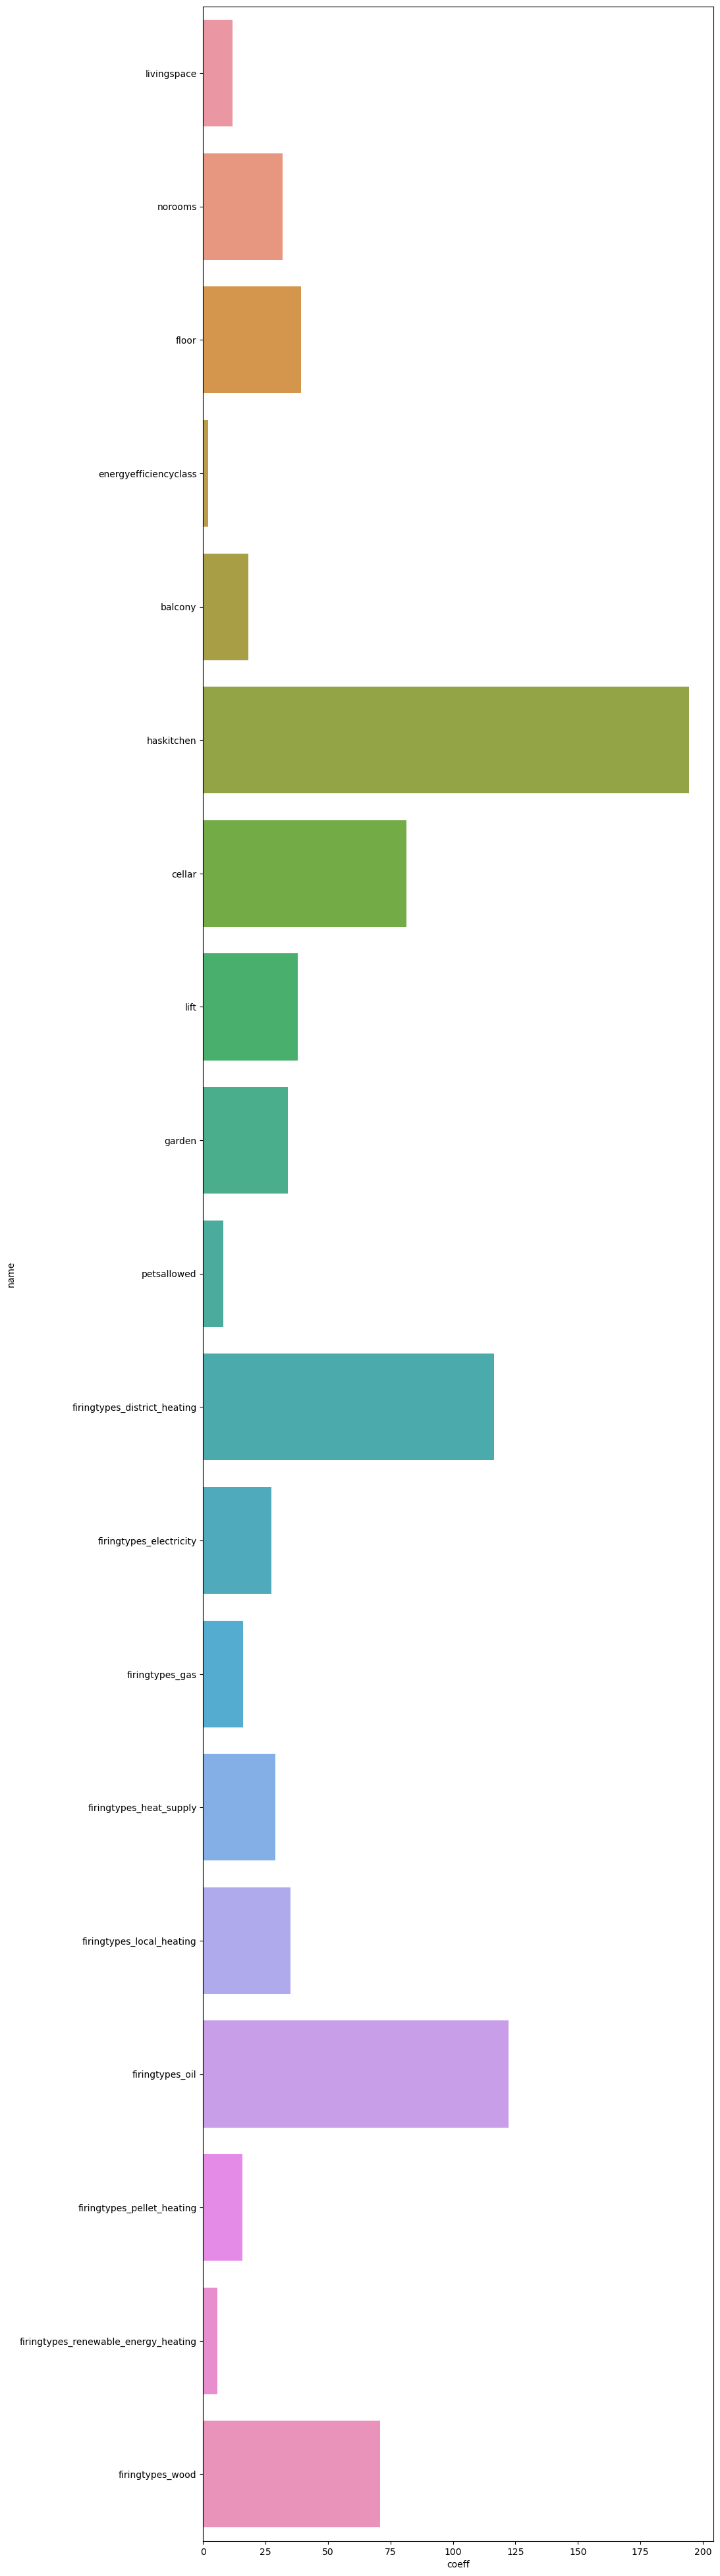

In [511]:
#visualizing
feature_names1=list(X.columns)
coefficients1 = model.coef_
coefficients1=[abs(i) for i in coefficients1[0]]

fi_dict1 = {"name":feature_names1,"coeff":coefficients1}
fi_df1 = pd.DataFrame(fi_dict1)
fi_df1
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 50))
sns.barplot(y = fi_df1["name"],x =fi_df1["coeff"])

# checking model quality

In [512]:
#test model
y_pred=pd.DataFrame(lr.predict(X_test))

In [513]:
#calculating mean errors
MSE_full=mse(y_pred,y_test)
RMSE_full=mse(y_pred,y_test, squared=False)
print(f"mse_full:{MSE_full}\nRMSE:{RMSE_full}")

mse_full:84409.197660216
RMSE:290.53261032148527


In [514]:
#calculating R2 for predictions
r2_score(y_test,y_pred)

0.5655073942793977

In [515]:
#calculating r2_score for train set
y_train_pred=pd.DataFrame(lr.predict(X_train))
r2_score(y_train,y_train_pred)

0.5692398604465527

In [516]:
y_test.head()

,baserent
3207,1240.00
952,1860.00
2633,478.80
139,1071.15
1937,1955.00


In [517]:
y_pred.head()

,0
0,1491.486658
1,1708.245747
2,869.943404
3,983.193737
4,1064.633677


In [518]:
result=pd.concat([y_test.head().reset_index(), round(y_pred.head())], axis=1)
result.reset_index()
result.rename(columns={'baserent': 'real_price', 0:'predicted_price'}, inplace=True)


In [519]:
# Calculate accuracy
result['Accuracy'] = round((result['predicted_price'] - result['real_price']).abs() / result['real_price'] * 100)

# Print or display the DataFrame
print(result[['index', 'real_price', 'predicted_price', 'Accuracy']])

   index  real_price  predicted_price  Accuracy
0   3207     1240.00           1491.0      20.0
1    952     1860.00           1708.0       8.0
2   2633      478.80            870.0      82.0
3    139     1071.15            983.0       8.0
4   1937     1955.00           1065.0      46.0


In [520]:
result.dtypes

index                int64
real_price         float64
predicted_price    float64
Accuracy           float64
dtype: object

In [521]:
#file_path = r"C:\Users\user\Desktop\ironhack_study\MidTermProject\for tableu\results.csv"
#result.to_csv(file_path, index=False)

In [522]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def predict(price):
    columns= ['baserent', 'firingtypes', 'balcony', 'haskitchen',
       'cellar','livingspace', 'petsallowed', 'geo_krs', 'lift', 'norooms', 'floor', 'garden', 'energyefficiencyclass']
    df = pd.DataFrame(columns=columns)
    row_index = 0  # Initialize row index
    for column in columns:
    
        if column == 'livingspace':
            user_input = float(input('Enter the living space:'))
            df.loc[row_index, column] = user_input
        elif column == 'norooms':
            user_input = float(input('Enter the number of rooms:'))
            df.loc[row_index, column] = user_input
        elif column == 'firingtypes':
            user_input = input('Enter the firingtype:')
            df.loc[row_index, column] = user_input
        elif column == 'balcony':
            user_input = input('Does it have balcony? (True/False):')
            user_input = 1 if user_input.lower() == 'true' else 0
            df.loc[row_index, column] = user_input
        elif column == 'haskitchen':
            user_input = input('Does it have kitchen? (True/False):')
            user_input = 1 if user_input.lower() == 'true' else 0
            df.loc[row_index, column] = user_input
        elif column == 'cellar':
            user_input = input('Does it have cellar? (True/False):')
            user_input = 1 if user_input.lower() == 'true' else 0
            df.loc[row_index, column] = user_input
        elif column == 'petsallowed':
            user_input = input('Does it have petsallowed? (yes/no/negotiable):')
    # Create a mapping for petsallowed
            petsallowed_mapping = {'no': 0, 'negotiable': 1, 'yes': 2}
    # Use the mapping to convert user_input to a numeric value
            df["petsallowed"] = petsallowed_mapping.get(user_input.lower(), -1)
            df.loc[row_index, column] = user_input
        elif column == 'geo_krs':
            user_input = input('What is the geo_krs?')
    # Convert 'geo_krs' to dummy variables and add them to the main DataFrame
            df = pd.concat([df, pd.get_dummies(pd.Series([user_input], name=column), dtype=int)], axis=1)
        elif column == 'lift':
            user_input = input('Does it have lift? (True/False):')
            user_input = 1 if user_input.lower() == 'true' else 0 
            df.loc[row_index, column] = user_input
        elif column == 'floor':
            user_input = int(input('Which floor is it?'))
            df.loc[row_index, column] = user_input
        elif column == 'garden':
            user_input = input('Does it have garden? (True/False):')
            user_input = 1 if user_input.lower() == 'true' else 0
            df.loc[row_index, column] = user_input
        elif column == 'energyefficiencyclass':
            user_input = input('What is the type of energy? (F, E, D, C, B, A, A_PLUS):')
            encoder = OneHotEncoder(categories=[["F", "E", "D", "C", "B", "A", "A_PLUS"]], drop='first', sparse=False)
            encoded_values = encoder.fit_transform([[user_input]])
            columns_onehot = [f"energyefficiencyclass_{cat}" for cat in encoder.get_feature_names_out(['energyefficiencyclass'])]

            # Create a DataFrame with the one-hot encoded values and the corresponding columns
            encoded_df = pd.DataFrame(encoded_values, columns=columns_onehot)

            # Concatenate the new DataFrame with the original ordinals DataFrame
            df = pd.concat([df, encoded_df], axis=1)
        else:
            print('please enter the correct value.')
    return df

In [523]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

def predict(price):
    columns = ['baserent', 'balcony', 'haskitchen',
               'cellar', 'livingspace', 'petsallowed', 'geo_krs', 'lift', 'floor', 'garden', 'energyefficiencyclass']
    
    df = pd.DataFrame(columns=columns)
    row_index = 0  # Initialize row index
    
    for column in columns:
        if column == 'livingspace' or column == 'floor':
            user_input = float(input(f'Enter the {column}: '))
            df.loc[row_index, column] = user_input
        elif column == 'balcony' or column == 'haskitchen' or column == 'cellar' or column == 'lift' or column == 'garden':
            user_input = input(f'Does it have {column}? (True/False): ')
            df.loc[row_index, column] = 1 if user_input.lower() == 'true' else 0
        elif column == 'petsallowed':
            user_input = input('Does it have petsallowed? (yes/no/negotiable): ')
            petsallowed_mapping = {'no': 0, 'negotiable': 1, 'yes': 2}
            df.loc[row_index, column] = petsallowed_mapping.get(user_input.lower(), -1)
            
        elif column == 'geo_krs':
            user_input = input('What is the geo_krs? ')
            user_input_dummy = pd.get_dummies(pd.Series([user_input], name=column), dtype=int)
            df = pd.concat([df, user_input_dummy], axis=1)
            #df.loc[row_index, column] = user_input
        
        #elif column == 'energyefficiencyclass':
            #user_input = input('What is the type of energy? (F, E, D, C, B, A, A_PLUS): ')
            #label_encoder = LabelEncoder()
            #encoded_value = label_encoder.fit_transform([user_input])
            #df.loc[row_index, column] = encoded_value


    # Create a DataFrame with the one-hot encoded values and the corresponding columns
            #encoded_df = pd.DataFrame(encoded_values, columns=columns_onehot)

    # Concatenate the new DataFrame with the original DataFrame
            #df = pd.concat([df, encoded_df], axis=1)

        else:
            print('Please enter the correct value.')
    
    # Fill NaN values with appropriate placeholders (e.g., 0 for numeric columns)
    df.fillna({'baserent': 0, 'livingspace': 0, 'norooms': 0, 'floor': 0}, inplace=True)
    
    # Increment the row_index for the next iteration
    row_index += 1
    
    return df


In [431]:
user_input = input('What is the geo_krs? ')
user_input_dummy = pd.get_dummies(pd.Series([user_input], name=column), dtype=int)
df = pd.concat([df, user_input_dummy], axis=1)

KeyboardInterrupt: Interrupted by user

In [306]:
predict(price)

Please enter the correct value.
Does it have balcony? (True/False): true
Does it have haskitchen? (True/False): true
Does it have cellar? (True/False): true
Enter the livingspace: 22
Does it have petsallowed? (yes/no/negotiable): no
What is the geo_krs? Berlin
Does it have lift? (True/False): true
Enter the floor: 5
Does it have garden? (True/False): true
Please enter the correct value.


,baserent,balcony,haskitchen,cellar,livingspace,petsallowed,geo_krs,lift,floor,garden,energyefficiencyclass,Berlin
0,0,1,1,1,22.0,0,NaN,1,5.0,1,NaN,1


In [524]:
X

,livingspace,norooms,floor,energyefficiencyclass,balcony,haskitchen,cellar,lift,garden,petsallowed,firingtypes_district_heating,firingtypes_electricity,firingtypes_gas,firingtypes_heat_supply,firingtypes_local_heating,firingtypes_oil,firingtypes_pellet_heating,firingtypes_renewable_energy_heating,firingtypes_wood
0,73.54,2.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1,0,0,0,0,0,0,0,0
1,33.00,1.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0
2,90.30,3.0,2.0,4.0,1.0,0.0,1.0,1.0,0.0,1.0,1,0,0,0,0,0,0,0,0
3,91.00,1.5,2.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
4,116.80,4.0,3.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366,121.74,5.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,2.0,1,0,0,0,0,0,0,0,0
3367,58.88,2.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0
3368,135.00,5.5,1.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0
3369,106.41,5.0,5.0,4.0,1.0,1.0,1.0,1.0,0.0,2.0,1,0,0,0,0,0,0,0,0


In [ ]:
pred_list = []
for column in X.columns:
    column_input = float(input(f"enter your value for {column}, possible values are {X[column].unique()}"))
    pred_list.append(column_input)
pred_list

In [299]:
pred_array = np.array(pred_list, dtype = float)

In [300]:
pred_array = pred_array.reshape(1,-1)

In [301]:
pred_array.shape

(1, 19)

In [302]:
model.predict(pred_array)

array([[3.39614215e+15]])

In [89]:
predict(price)

Please enter the correct value.
Does it have balcony? (True/False): true
Does it have haskitchen? (True/False): true
Does it have cellar? (True/False): true
Enter the livingspace: 33
Does it have petsallowed? (yes/no/negotiable): no
What is the geo_krs? Berlin
Does it have lift? (True/False): true
Enter the norooms: 3
Enter the floor: 3
Does it have garden? (True/False): true
Please enter the correct value.


,baserent,balcony,haskitchen,cellar,livingspace,petsallowed,geo_krs,lift,norooms,floor,garden,energyefficiencyclass,Berlin
0,0,1,1,1,33.0,0,NaN,1,3.0,3.0,1,NaN,1


In [90]:
user_input = input('What is the geo_krs? ')


What is the geo_krs? Berlin


In [91]:
columns = ['baserent', 'firingtypes', 'balcony', 'haskitchen',
               'cellar', 'livingspace', 'petsallowed', 'geo_krs', 'lift', 
               'norooms', 'floor', 'garden', 'energyefficiencyclass']
    
for column in columns:
    user_input_dummy = pd.get_dummies(pd.Series([user_input], name=column), dtype=int)


In [92]:
user_input_dummy

,Berlin
0,1


In [93]:
df = pd.concat([df, user_input_dummy], axis=1)

In [94]:
df

,baserent,balcony,haskitchen,cellar,livingspace,petsallowed,firingtypes,geo_krs,lift,norooms,floor,garden,energyefficiencyclass,Berlin
0,1338.43,True,True,True,73.54,negotiable,district_heating,Berlin,True,2.0,0.0,False,B,1.0
1,1390.00,True,False,False,33.00,no,district_heating,M?nchen,True,1.0,3.0,False,C,NaN
2,1299.00,True,False,True,90.30,negotiable,district_heating,Hamburg,True,3.0,2.0,False,B,NaN
3,1680.00,True,True,True,91.00,no,gas,M?nchen,True,1.5,2.0,False,A,NaN
4,992.80,False,False,True,116.80,no,gas,Unna_Kreis,True,4.0,3.0,False,A_PLUS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,1533.92,True,True,False,121.74,yes,district_heating,Dresden,True,5.0,2.0,False,C,NaN
3390,1162.88,True,True,True,58.88,negotiable,district_heating,Berlin,True,2.0,0.0,True,C,NaN
3391,1450.00,True,True,True,135.00,no,renewable_energy_heating,T?bingen_Kreis,False,5.5,1.0,False,A_PLUS,NaN
3392,1383.33,True,True,True,106.41,yes,district_heating,Dresden,True,5.0,5.0,False,B,NaN
